In [29]:
# libraries 
import pandas as pd
#%pip install -q plotnine
from plotnine import *


In [48]:
# loading data C:\Users\HelenSepman\OneDrive - Kruvelab\Documents\GitHub\ML_calibration_graph_linearity\data
file_path = "C:/Users/HelenSepman/OneDrive - Kruvelab/Documents/GitHub/ML_calibration_graph_linearity/data/data_ready_231029.csv"
df_calibrations = pd.read_csv(file_path)
df_calibrations_lab1 = df_calibrations[df_calibrations['lab']=='L2']
#df_calibrations_lab1 = df_calibrations_lab1[df_calibrations_lab1['compound'].isin(["Amitrole", "Vancomycin_H2"])]

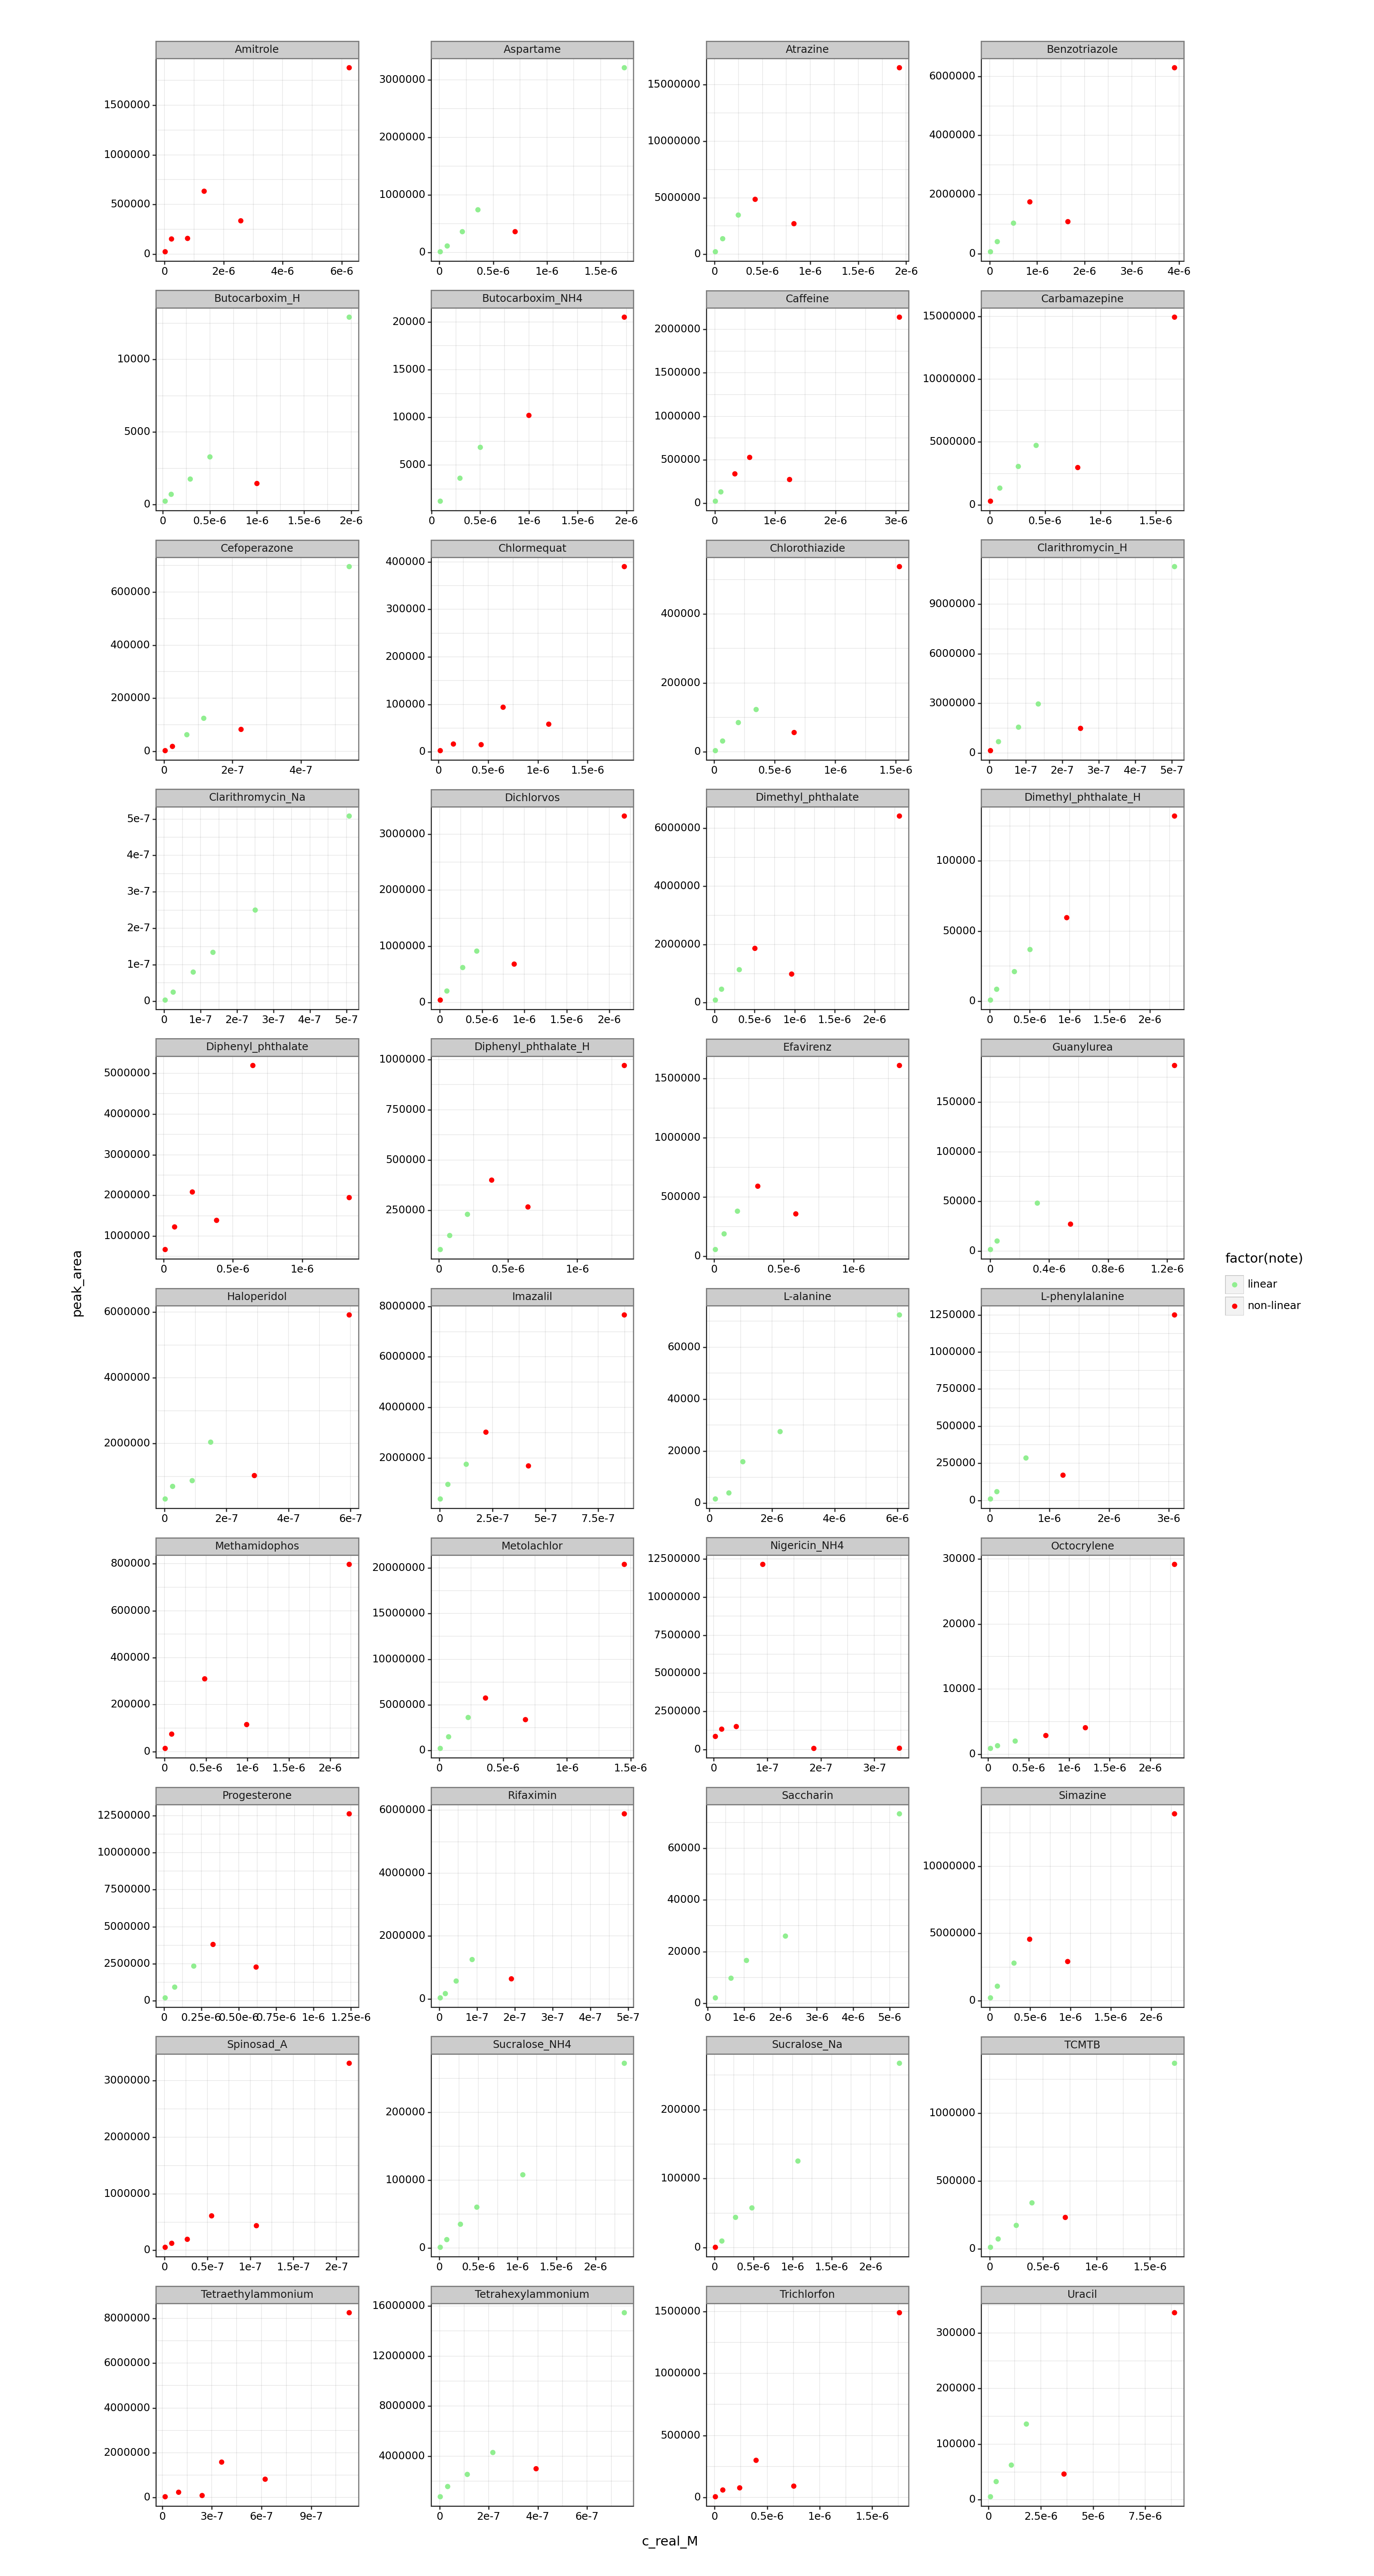

<Figure Size: (1600 x 3000)>

In [49]:
fig = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig

#### Notes from calibration graphs
* Some points might be super difficult to classify
* scaling is needed
* can one of the additional confirmational parameters be "if we fit a line through "linear" points, the average residuals for non-linear and linear points are different by X; for linear the average residual is less than y" etc?

#### Potential solutions to try to classify linear and non-linear points
* CNN pattern recognition? Would we need to transfer this data to a AxA grid matrix for all?

#### Final objective
Extract slope for the calibration graph points within linear range
As no ML algorithm is 100% accurate, we could give lower weights to the "non-linear" classified datapoints when fitting linear regression.

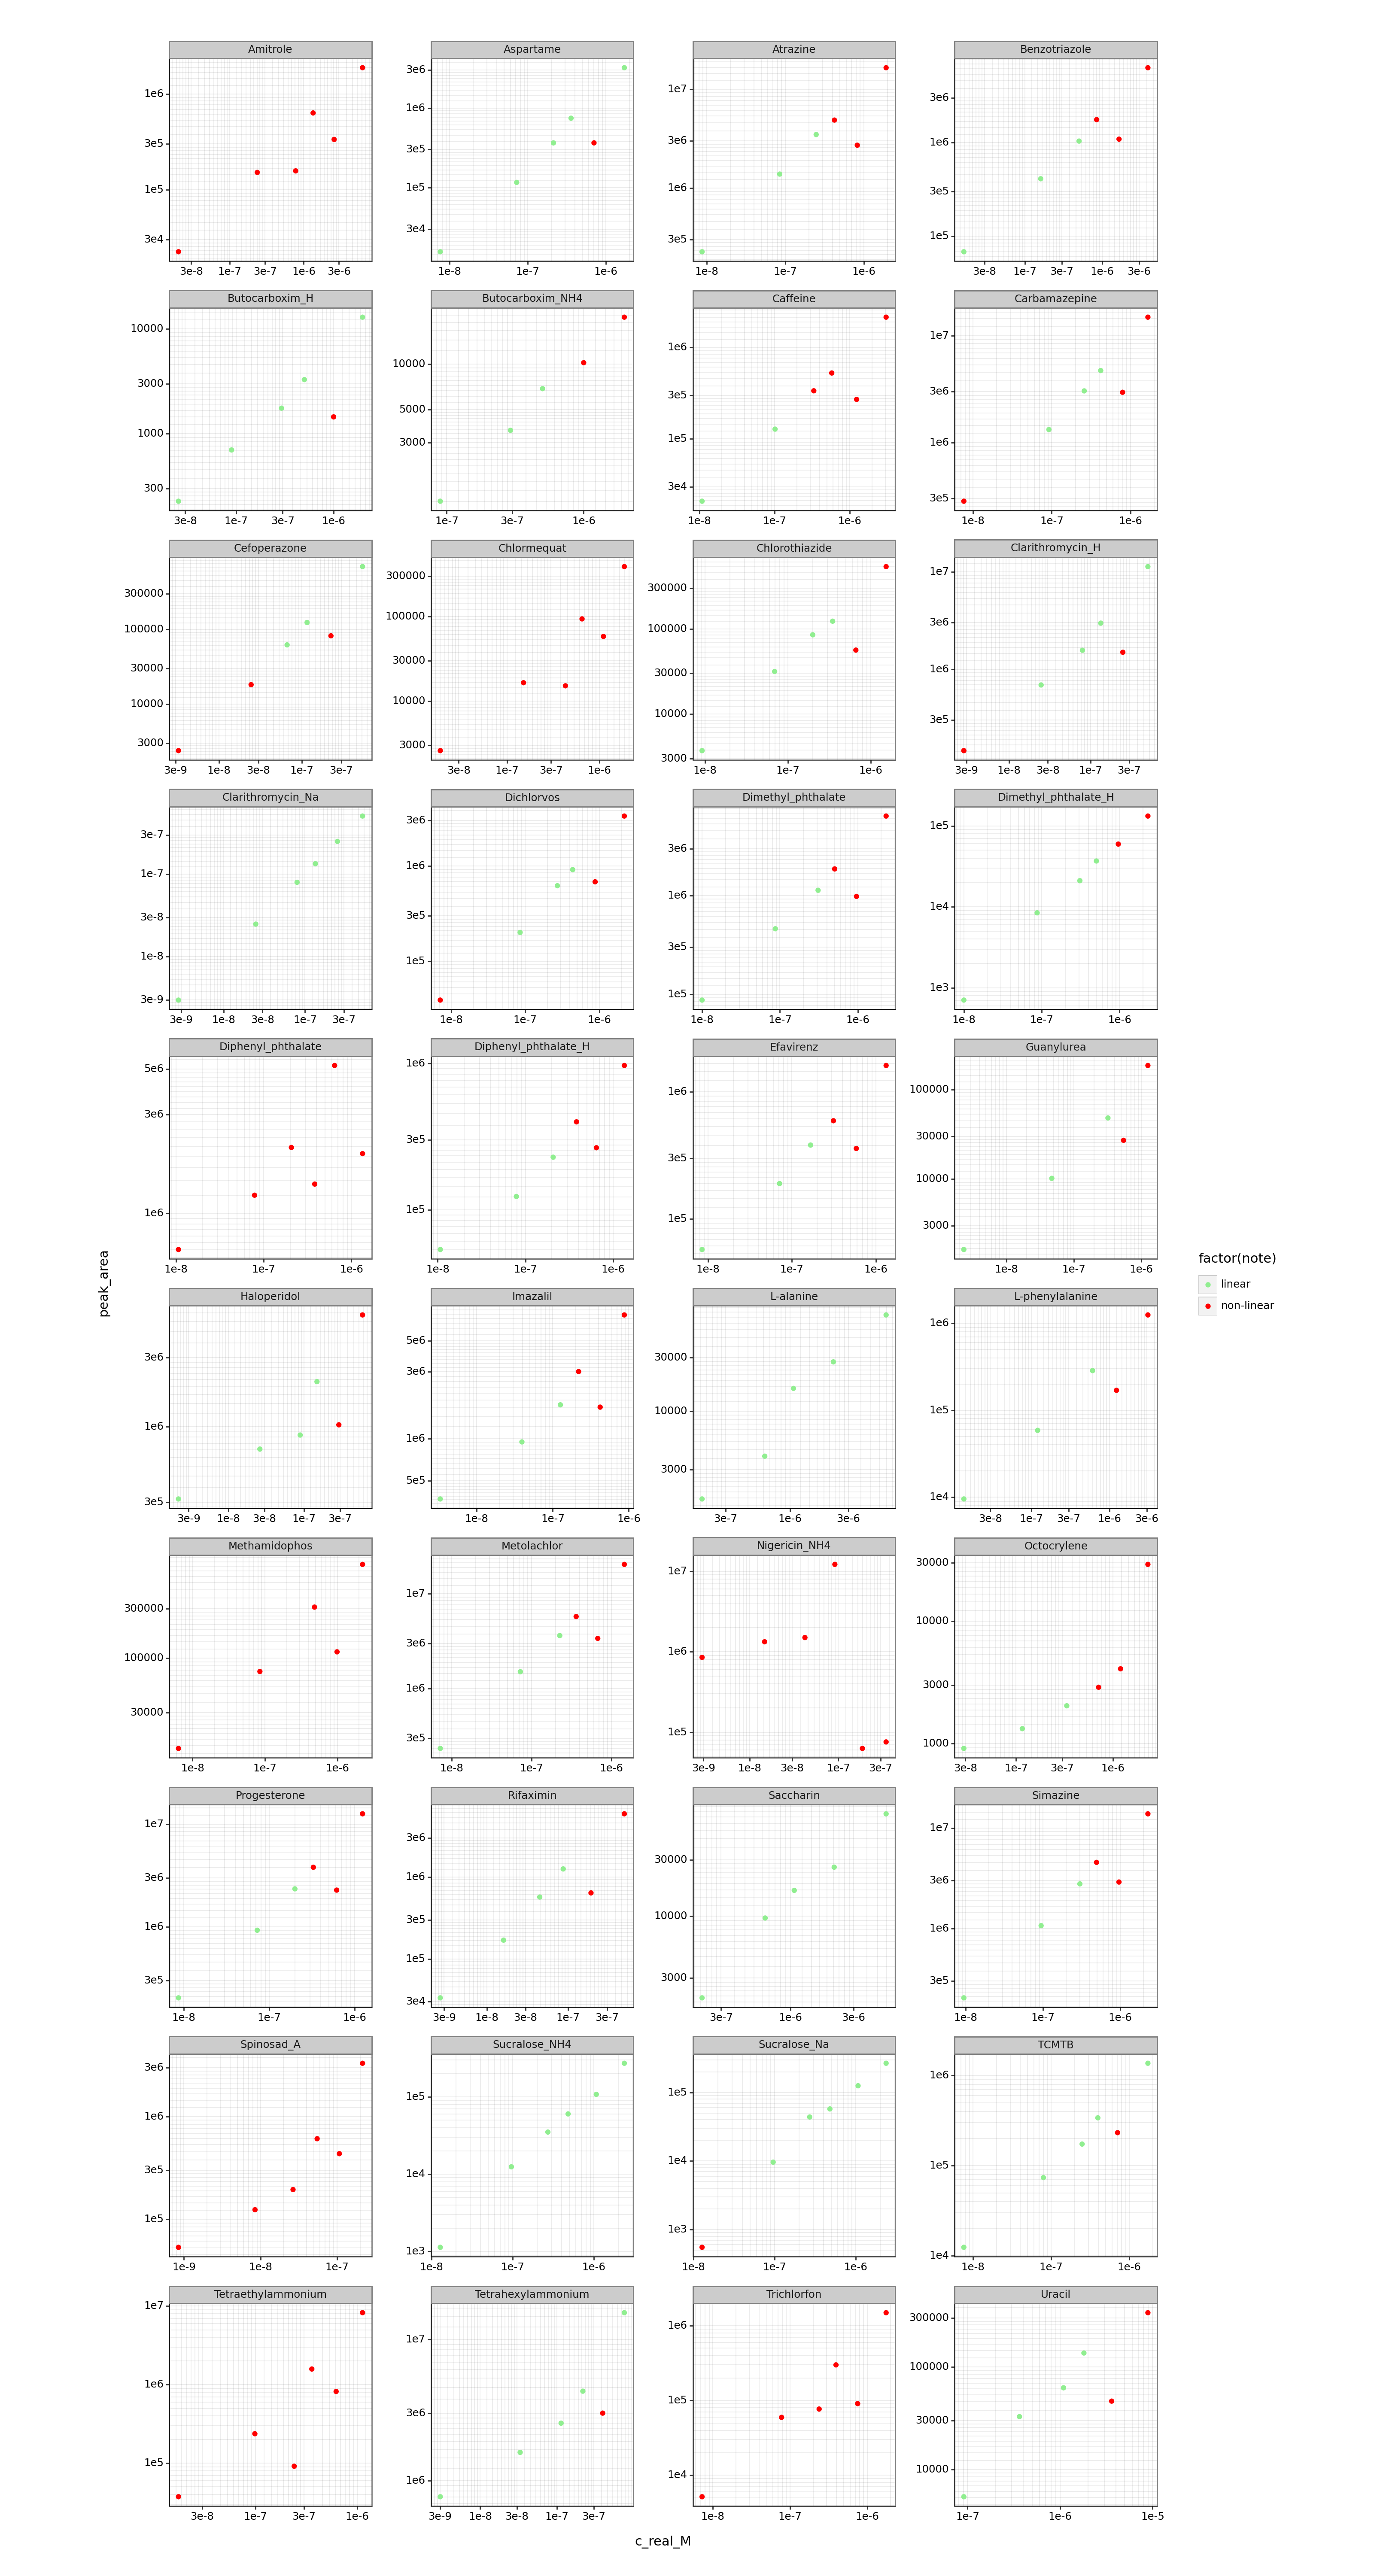

<Figure Size: (1600 x 3000)>

In [50]:
# same plot but log scale x and y
fig_log = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    scale_y_log10() +
    scale_x_log10() +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_log

## Response factors as barplot

C:\Users\HelenSepman\AppData\Local\Temp\ipykernel_30460\55471563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


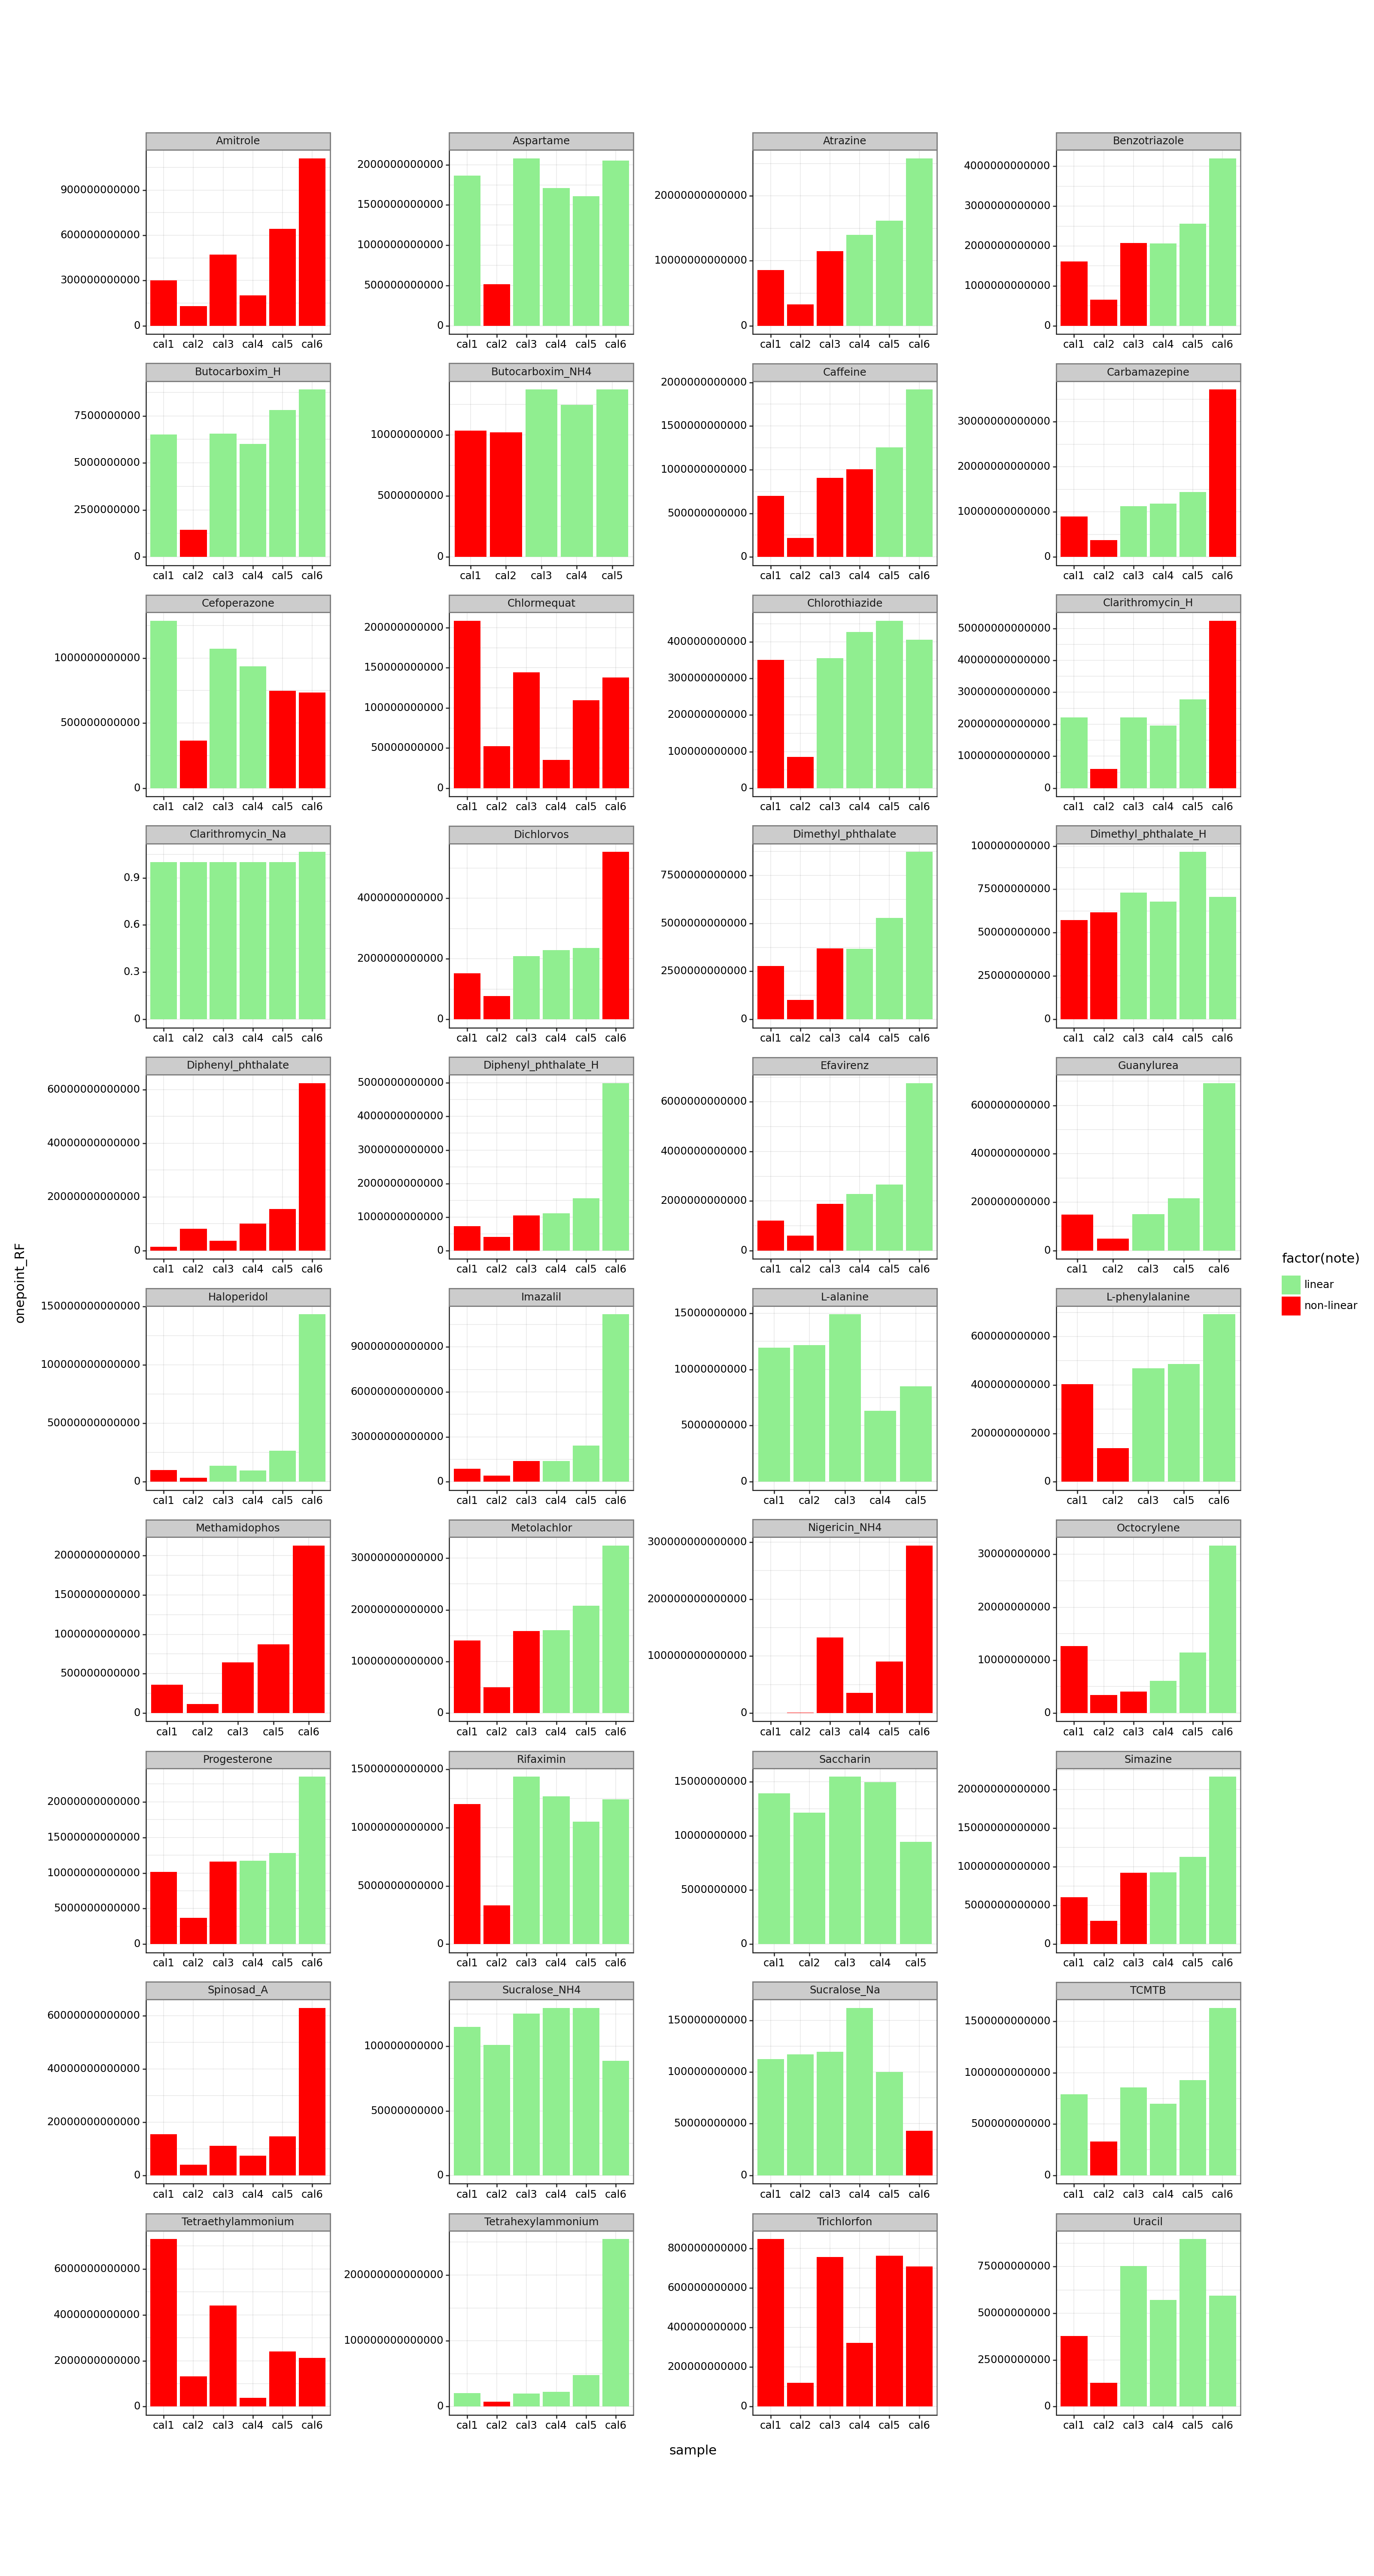

<Figure Size: (1600 x 3000)>

In [51]:
df_calibrations_lab1["onepoint_RF"] = df_calibrations_lab1["peak_area"] / df_calibrations_lab1["c_real_M"]
fig_bars = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'sample', y = 'onepoint_RF')) +
    geom_col(aes(fill = "factor(note)")) +
    scale_fill_manual(values=("lightgreen", "red")) +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_bars

In [40]:
groups = df_calibrations_lab1.groupby("compound")
result_df = df_calibrations_lab1.groupby('compound')['peak_area'].max().reset_index()
result_df = result_df.rename(columns={'peak_area': 'max_area'})
df_calibrations_lab1_merged = pd.merge(df_calibrations_lab1, result_df, on='compound')
df_calibrations_lab1_merged["norm_area"] = df_calibrations_lab1_merged["peak_area"]/df_calibrations_lab1_merged["max_area"] 
df_calibrations_lab1_merged

,lab,compound,sample_type,RT,sample,peak_area,note,c_real_M,onepoint_RF,max_area,norm_area
0,L1,Amitrole,cal,0.72,cal1,2.856002e+08,non-linear,6.250000e-06,4.569604e+13,2.856002e+08,1.000000
1,L1,Amitrole,cal,0.72,cal2,1.030577e+08,non-linear,2.580000e-06,3.994483e+13,2.856002e+08,0.360846
2,L1,Amitrole,cal,0.72,cal3,6.593301e+07,non-linear,1.340000e-06,4.920374e+13,2.856002e+08,0.230858
3,L1,Amitrole,cal,0.72,cal4,3.805867e+07,non-linear,7.780000e-07,4.891860e+13,2.856002e+08,0.133259
4,L1,Amitrole,cal,0.72,cal5,1.340538e+07,linear,2.350000e-07,5.704416e+13,2.856002e+08,0.046938
...,...,...,...,...,...,...,...,...,...,...,...
226,L1,Vancomycin_H2,cal,1.90,cal1,4.545258e+06,non-linear,2.710000e-07,1.677217e+13,4.545258e+06,1.000000
227,L1,Vancomycin_H2,cal,1.90,cal2,1.168391e+06,linear,1.220000e-07,9.576978e+12,4.545258e+06,0.257057
228,L1,Vancomycin_H2,cal,1.90,cal3,7.061743e+05,linear,6.190000e-08,1.140831e+13,4.545258e+06,0.155365
229,L1,Vancomycin_H2,cal,1.90,cal4,4.131183e+05,linear,3.790000e-08,1.090022e+13,4.545258e+06,0.090890


In [41]:
groups = df_calibrations_lab1.groupby("compound")
result_df = df_calibrations_lab1.groupby('compound')['c_real_M'].max().reset_index()
result_df = result_df.rename(columns={'c_real_M': 'c_max'})
df_calibrations_lab1_merged = pd.merge(df_calibrations_lab1_merged, result_df, on='compound')
df_calibrations_lab1_merged["c_norm"] = df_calibrations_lab1_merged["c_real_M"]/df_calibrations_lab1_merged["c_max"] 
df_calibrations_lab1_merged

,lab,compound,sample_type,RT,sample,peak_area,note,c_real_M,onepoint_RF,max_area,norm_area,c_max,c_norm
0,L1,Amitrole,cal,0.72,cal1,2.856002e+08,non-linear,6.250000e-06,4.569604e+13,2.856002e+08,1.000000,6.250000e-06,1.000000
1,L1,Amitrole,cal,0.72,cal2,1.030577e+08,non-linear,2.580000e-06,3.994483e+13,2.856002e+08,0.360846,6.250000e-06,0.412800
2,L1,Amitrole,cal,0.72,cal3,6.593301e+07,non-linear,1.340000e-06,4.920374e+13,2.856002e+08,0.230858,6.250000e-06,0.214400
3,L1,Amitrole,cal,0.72,cal4,3.805867e+07,non-linear,7.780000e-07,4.891860e+13,2.856002e+08,0.133259,6.250000e-06,0.124480
4,L1,Amitrole,cal,0.72,cal5,1.340538e+07,linear,2.350000e-07,5.704416e+13,2.856002e+08,0.046938,6.250000e-06,0.037600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,L1,Vancomycin_H2,cal,1.90,cal1,4.545258e+06,non-linear,2.710000e-07,1.677217e+13,4.545258e+06,1.000000,2.710000e-07,1.000000
227,L1,Vancomycin_H2,cal,1.90,cal2,1.168391e+06,linear,1.220000e-07,9.576978e+12,4.545258e+06,0.257057,2.710000e-07,0.450185
228,L1,Vancomycin_H2,cal,1.90,cal3,7.061743e+05,linear,6.190000e-08,1.140831e+13,4.545258e+06,0.155365,2.710000e-07,0.228413
229,L1,Vancomycin_H2,cal,1.90,cal4,4.131183e+05,linear,3.790000e-08,1.090022e+13,4.545258e+06,0.090890,2.710000e-07,0.139852


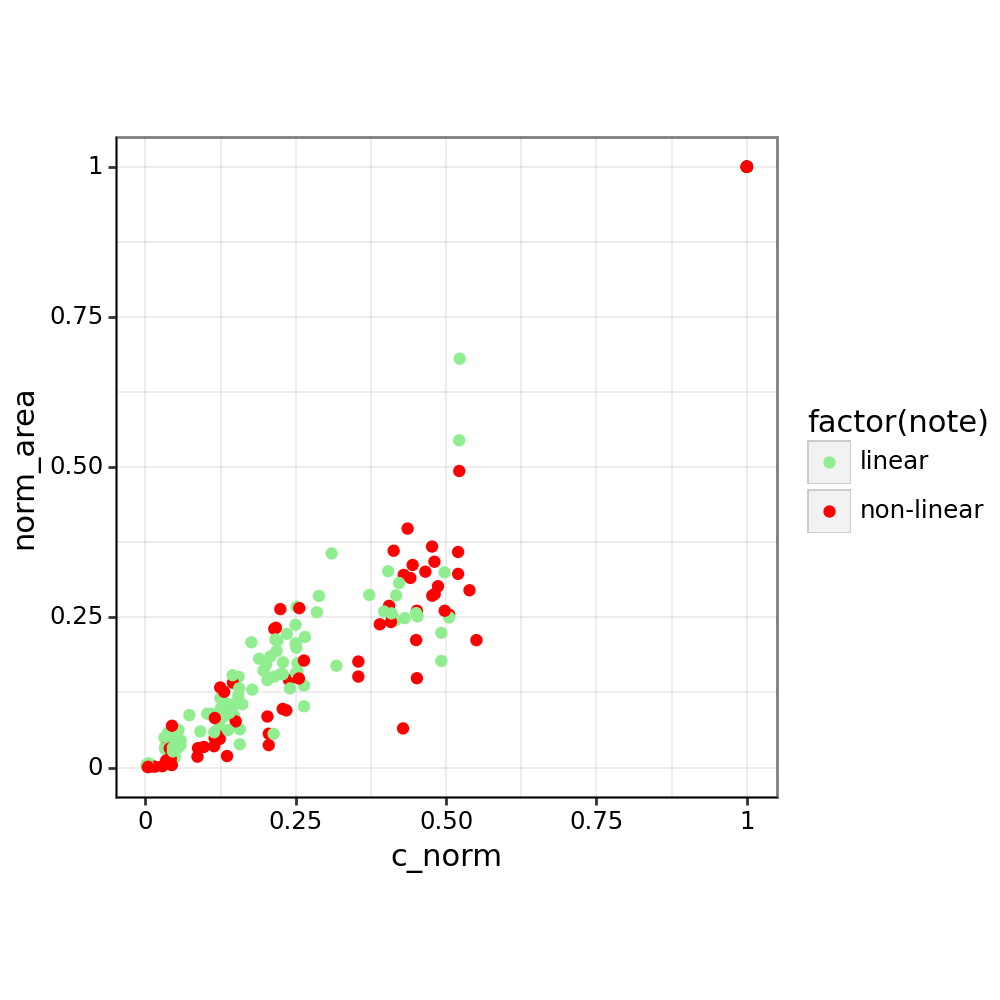

<Figure Size: (500 x 500)>

In [46]:
fig_norm = (
    ggplot(data = df_calibrations_lab1_merged,
          mapping = aes(x = 'c_norm', y = 'norm_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    #facet_wrap("compound",
    #           ncol=4,
    #           scales="free") +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_norm

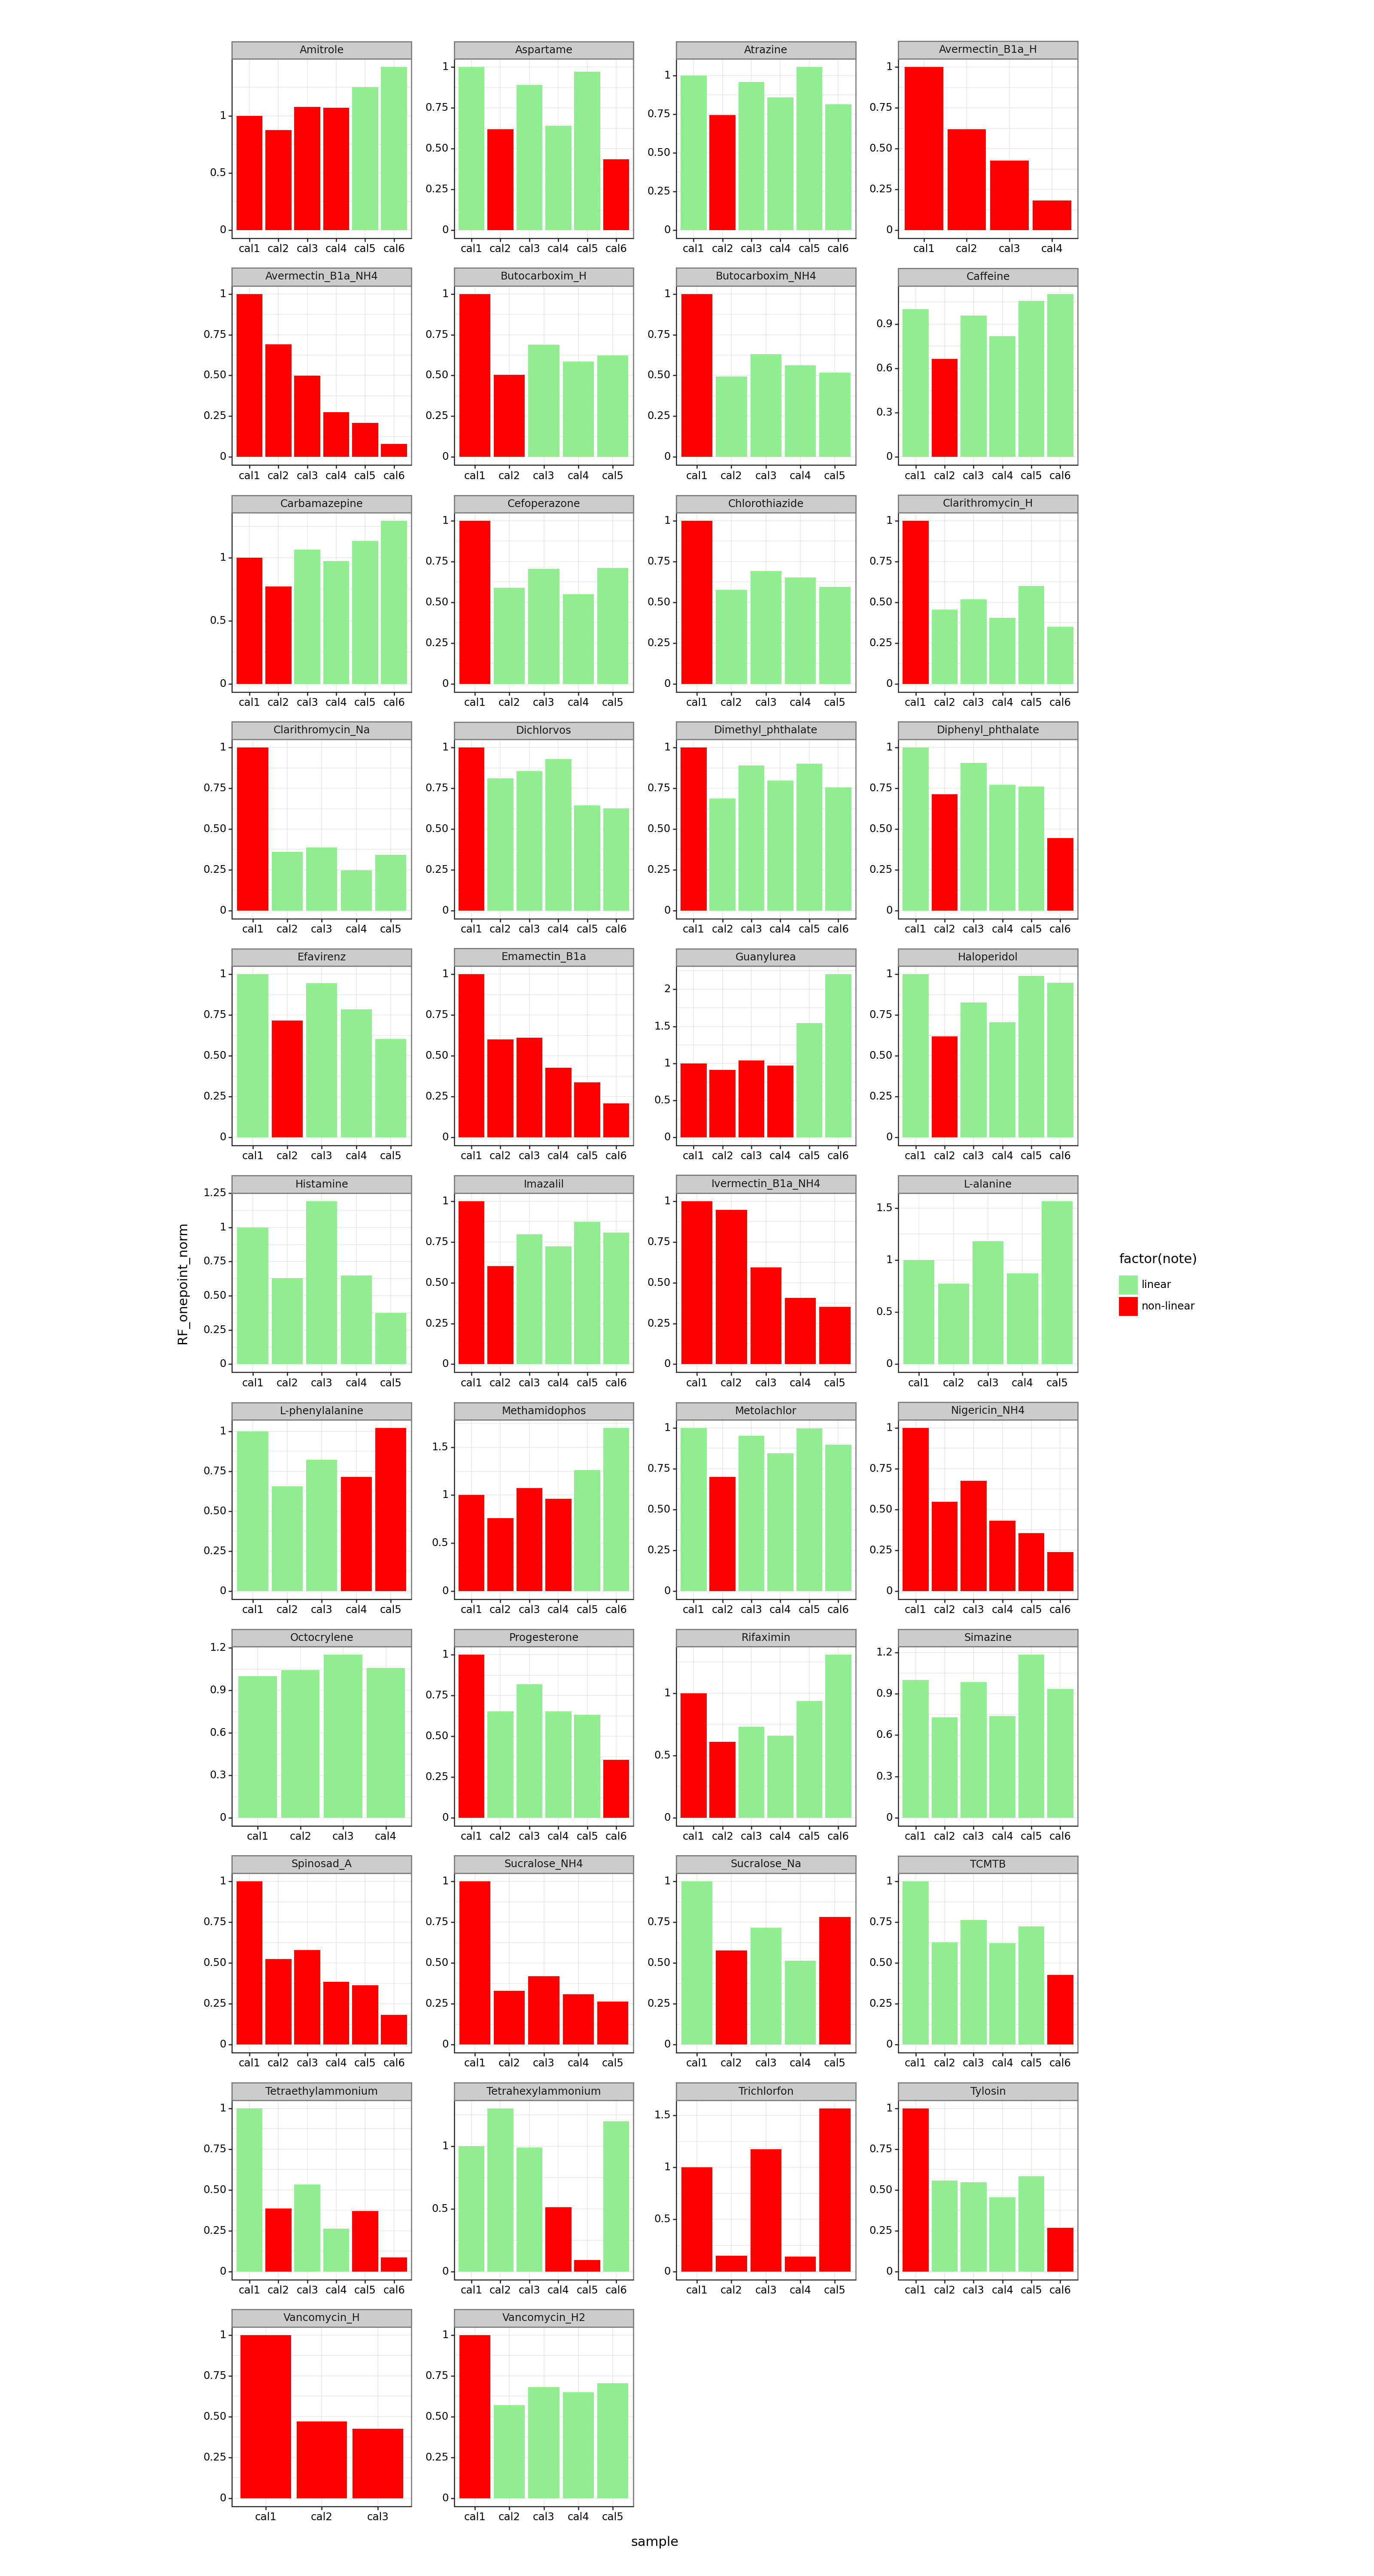

<Figure Size: (1600 x 3000)>

In [47]:
df_calibrations_lab1_merged["RF_onepoint_norm"] = df_calibrations_lab1_merged["norm_area"]/df_calibrations_lab1_merged["c_norm"] 
fig_bars2 = (
    ggplot(data = df_calibrations_lab1_merged,
          mapping = aes(x = 'sample', y = 'RF_onepoint_norm')) +
    geom_col(aes(fill = "factor(note)")) +
    scale_fill_manual(values=("lightgreen", "red")) +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_bars2


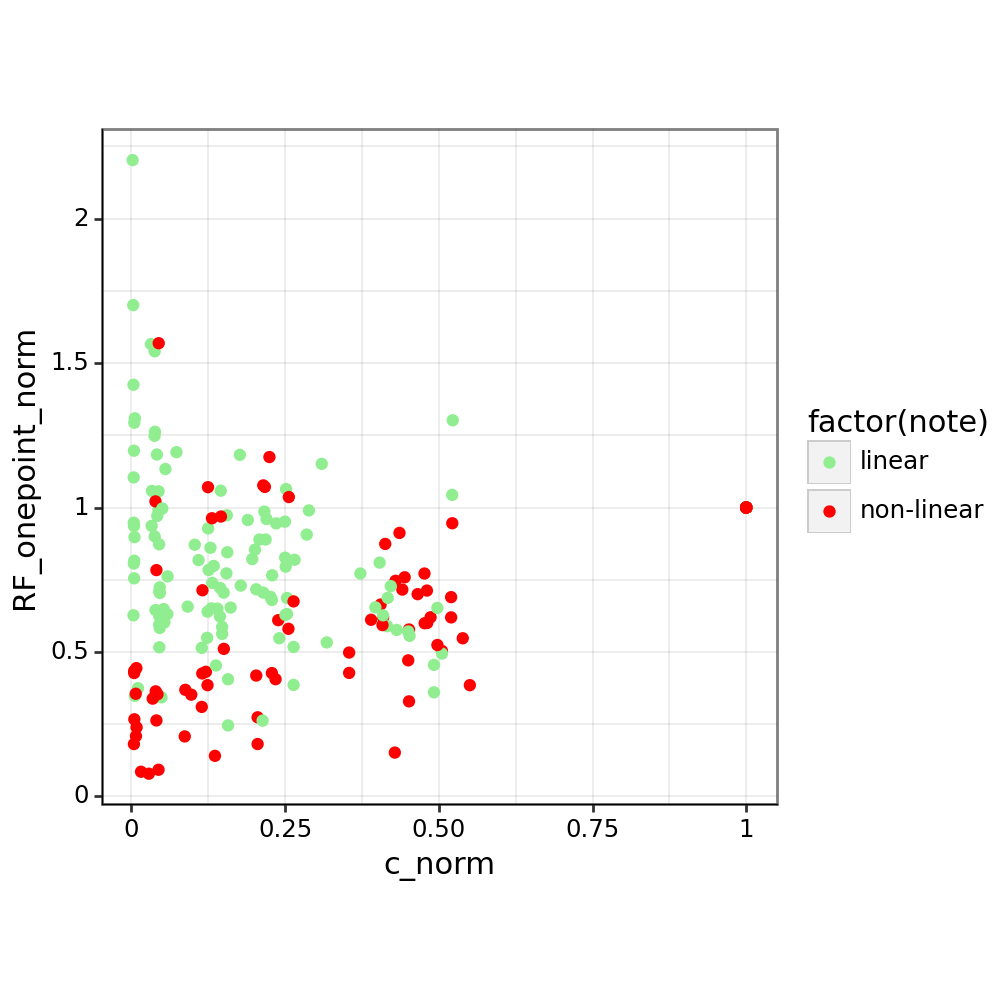

<Figure Size: (500 x 500)>

In [54]:
fig_rf_dots = (
    ggplot(data = df_calibrations_lab1_merged,
          mapping = aes(x = 'c_norm', y = 'RF_onepoint_norm')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    #facet_wrap("compound",
    #           ncol=4,
    #           scales="free") +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_rf_dots

## logRFs of non-normalized?

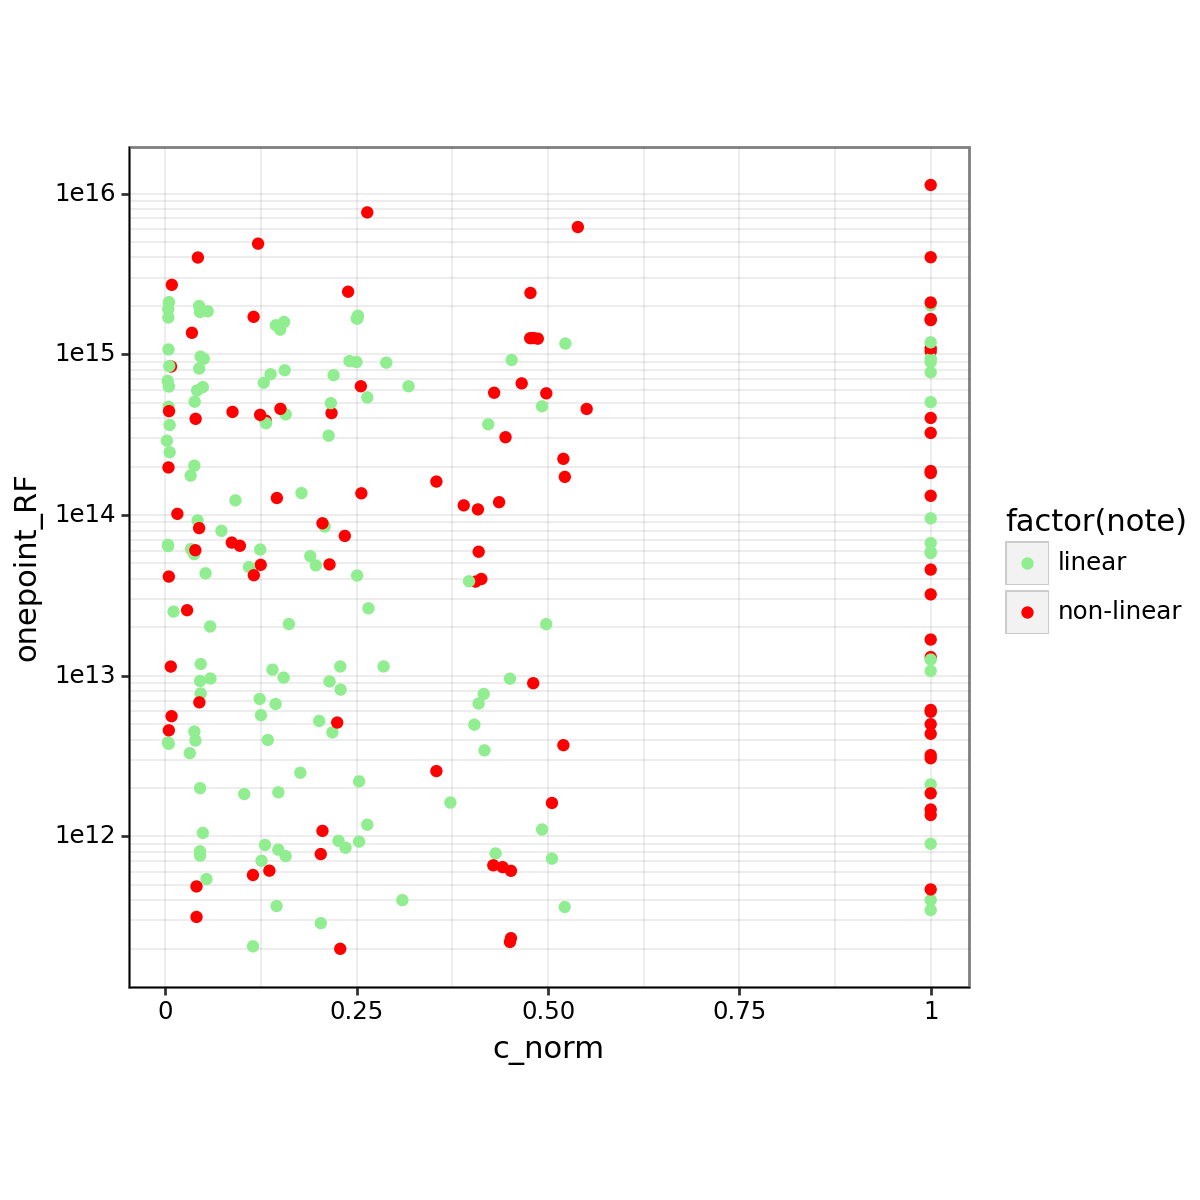

<Figure Size: (600 x 600)>

In [59]:
fig_log_RF = (
    ggplot(data = df_calibrations_lab1_merged,
          mapping = aes(x = 'c_norm', y = 'onepoint_RF')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    scale_y_log10() +
    #scale_x_log10() +
    theme_bw() +
    #facet_wrap("compound",
    #           ncol=4,
    #           scales="free") +
    theme(figure_size = (6, 6),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          ) 
)
fig_log_RF